# 差分データの可視化

In [98]:
import xlrd
import pprint
import openpyxl
import numpy as np
from datetime import datetime as dt
import pandas as pd
from sklearn import preprocessing
import copy

In [99]:
bed_data_filename = 'bed_data.csv'
before_csv = 'osaka_data_before.csv'
data_filename = 'osaka_data_before.xlsx'
save_filename = 'before_1week_Diff.xlsx'
data_sheet = 'Sheet1'

In [100]:
#開始日と終了日を参照する
df = pd.read_csv('./data/'+bed_data_filename, encoding='shift-jis', index_col=0, parse_dates=['日付'])
start_day = df.index[0]
end_day = df.index[-1]
start_day, end_day

(Timestamp('2020-07-30 00:00:00'), Timestamp('2021-09-18 00:00:00'))

In [101]:
test_start = dt(2020,10,1,0)
#test_end = dt(2021,1,11,0)
day_num = (end_day-start_day).days

#diff
total_data_num = day_num+1 -1 
test_data_num = (end_day-test_start).days+1 -1

teach_data_num = total_data_num-test_data_num

In [102]:
# csvファイルを読み込む
df_csv = pd.read_csv('./data/'+before_csv, encoding='shift-jis')
csv_data = df_csv.drop(['日付'], axis=1)

In [103]:
df_csv

,日付,検査件数,陽性人数,現在陽性者数,退院,死亡,リンク不明者,病床使用率
0,2020-07-30,2070,190,1154,121,0,135,21.0
1,2020-07-31,2328,216,1265,104,1,146,23.0
2,2020-08-01,2293,195,1342,118,0,137,24.0
3,2020-08-02,1562,194,1445,91,0,142,29.0
4,2020-08-03,1266,81,1423,102,1,55,30.0
...,...,...,...,...,...,...,...,...
411,2021-09-14,6947,942,15603,2285,4,556,60.0
412,2021-09-15,16708,1160,14684,2075,9,685,56.0
413,2021-09-16,16887,858,13765,1775,12,518,54.0
414,2021-09-17,20092,735,12749,1755,5,445,52.0


In [104]:
df_csv.dtypes

日付         object
検査件数        int64
陽性人数        int64
現在陽性者数      int64
退院          int64
死亡          int64
リンク不明者      int64
病床使用率     float64
dtype: object

In [105]:
data = df_csv.drop(['日付', '病床使用率'], axis=1)
data

,検査件数,陽性人数,現在陽性者数,退院,死亡,リンク不明者
0,2070,190,1154,121,0,135
1,2328,216,1265,104,1,146
2,2293,195,1342,118,0,137
3,1562,194,1445,91,0,142
4,1266,81,1423,102,1,55
...,...,...,...,...,...,...
411,6947,942,15603,2285,4,556
412,16708,1160,14684,2075,9,685
413,16887,858,13765,1775,12,518
414,20092,735,12749,1755,5,445


In [106]:
diff_data = data.diff(1).dropna()

In [107]:
diff_data.replace([np.inf, -np.inf], np.nan, inplace=True)
diff_data.dropna(axis=0, how='any', inplace=True)
diff_data

,検査件数,陽性人数,現在陽性者数,退院,死亡,リンク不明者
1,258.0,26.0,111.0,-17.0,1.0,11.0
2,-35.0,-21.0,77.0,14.0,-1.0,-9.0
3,-731.0,-1.0,103.0,-27.0,0.0,5.0
4,-296.0,-113.0,-22.0,11.0,1.0,-87.0
5,1113.0,112.0,86.0,4.0,0.0,74.0
...,...,...,...,...,...,...
411,-5747.0,490.0,-1336.0,268.0,0.0,321.0
412,9761.0,218.0,-919.0,-210.0,5.0,129.0
413,179.0,-302.0,-919.0,-300.0,3.0,-167.0
414,3205.0,-123.0,-1016.0,-20.0,-7.0,-73.0


In [108]:
index_num = [n for n in diff_data.index]
#削除されたindex　numberの確認
#病床からも削除をする
drop_num = []
for i in range(len(data)):
    if not i in index_num:
        drop_num.append(i)
drop_num

[0]

In [109]:
date_tb = df_csv['日付'].drop(index=drop_num)
date_tb

1      2020-07-31
2      2020-08-01
3      2020-08-02
4      2020-08-03
5      2020-08-04
          ...    
411    2021-09-14
412    2021-09-15
413    2021-09-16
414    2021-09-17
415    2021-09-18
Name: 日付, Length: 415, dtype: object

In [110]:
date_tb = pd.to_datetime(date_tb)

In [111]:
diff_data.insert(0, '日付', date_tb)

In [112]:
diff_data

,日付,検査件数,陽性人数,現在陽性者数,退院,死亡,リンク不明者
1,2020-07-31,258.0,26.0,111.0,-17.0,1.0,11.0
2,2020-08-01,-35.0,-21.0,77.0,14.0,-1.0,-9.0
3,2020-08-02,-731.0,-1.0,103.0,-27.0,0.0,5.0
4,2020-08-03,-296.0,-113.0,-22.0,11.0,1.0,-87.0
5,2020-08-04,1113.0,112.0,86.0,4.0,0.0,74.0
...,...,...,...,...,...,...,...
411,2021-09-14,-5747.0,490.0,-1336.0,268.0,0.0,321.0
412,2021-09-15,9761.0,218.0,-919.0,-210.0,5.0,129.0
413,2021-09-16,179.0,-302.0,-919.0,-300.0,3.0,-167.0
414,2021-09-17,3205.0,-123.0,-1016.0,-20.0,-7.0,-73.0


## 同時表示

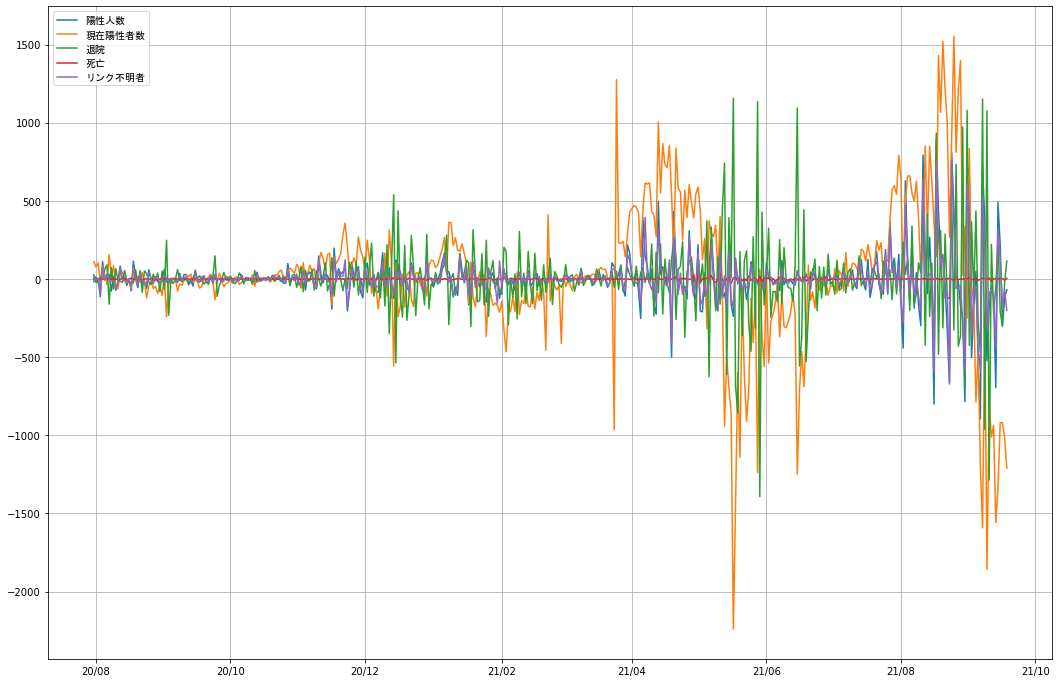

In [122]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#自動で割り振られる色のリストの取得
c = plt.rcParams['axes.prop_cycle'].by_key()['color']

remove_name = ['日付', '検査件数']

plt.figure(figsize=(18,12))

for name in diff_data.columns:
    if not name in remove_name:
        plt.plot(diff_data['日付'], diff_data[name], label=name)    
        
# フォーマット変更はこれ追加 / ("%y/%m")をいじる
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y/%m")) 


# 目盛のインターバル変更はこれ追加 /（interval=2）の数値をいじる
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        
plt.legend(prop={"family":"MS Gothic"})
plt.grid()
plt.show()

## 別々表示

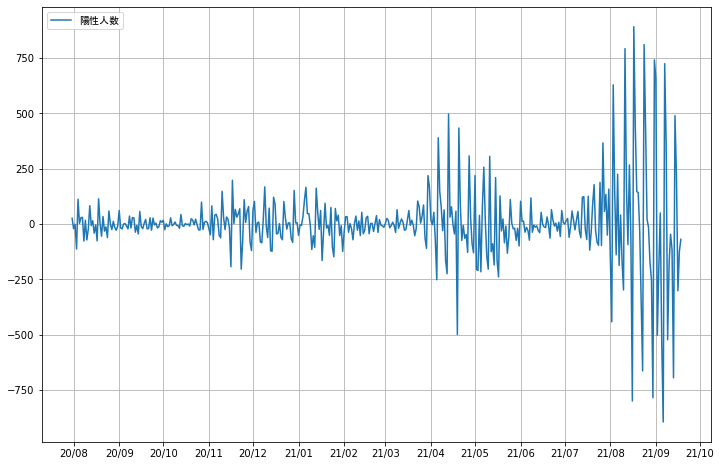

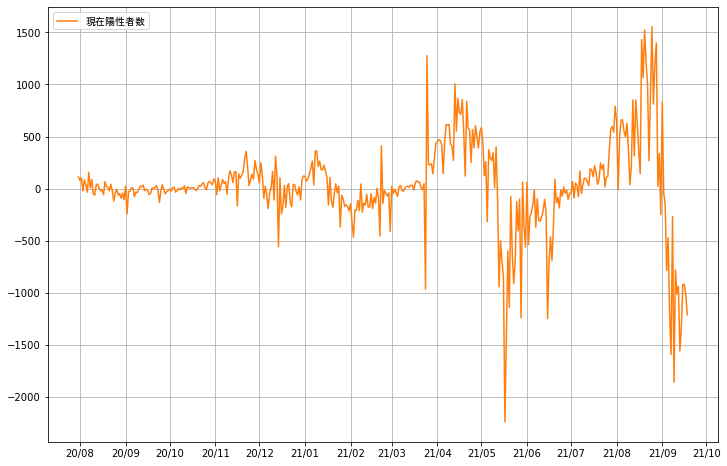

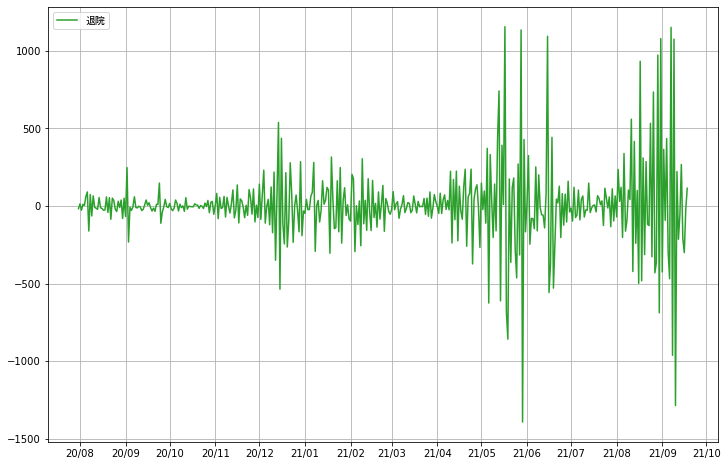

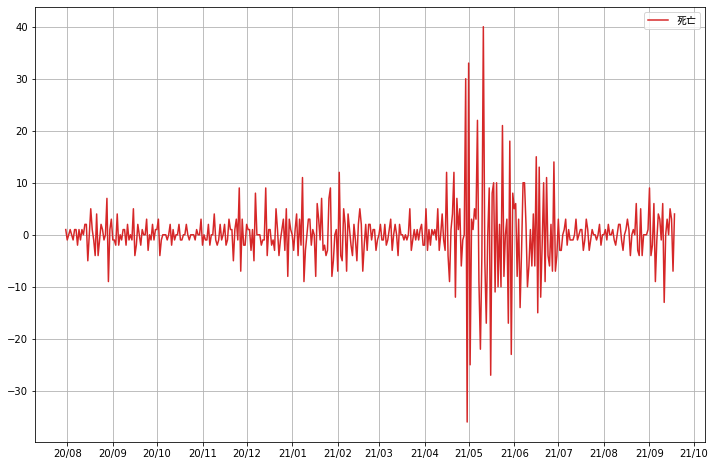

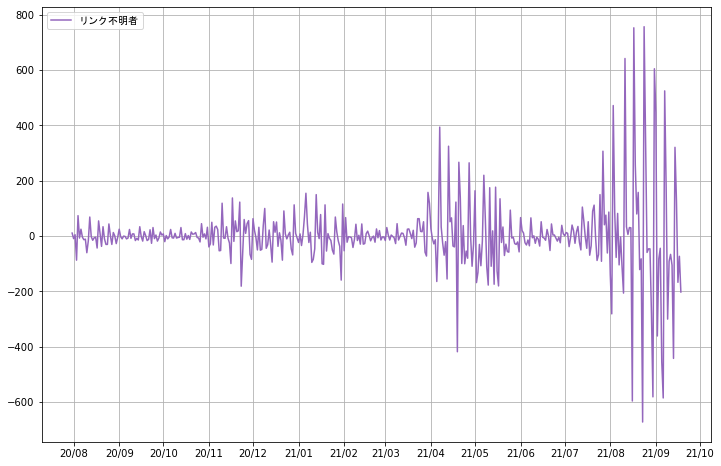

In [154]:
n = 0 
for name in diff_data.columns:
    if not name in remove_name:
        plt.figure(figsize=(12,8))
        plt.plot(diff_data['日付'], diff_data[name], label=name, c=c[n])
        n += 1
        
        # フォーマット変更はこれ追加 / ("%y/%m")をいじる
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y/%m")) 


        # 目盛のインターバル変更はこれ追加 /（interval=2）の数値をいじる
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

        plt.legend(prop={"family":"MS Gothic"})
        plt.grid()
        plt.show()

# 対数差分

In [114]:
# csvファイルを読み込む
df_csv = pd.read_csv('./data/'+before_csv, encoding='shift-jis')
csv_data = df_csv.drop(['日付'], axis=1)

In [115]:
data = df_csv.drop(['日付'], axis=1)
data

,検査件数,陽性人数,現在陽性者数,退院,死亡,リンク不明者,病床使用率
0,2070,190,1154,121,0,135,21.0
1,2328,216,1265,104,1,146,23.0
2,2293,195,1342,118,0,137,24.0
3,1562,194,1445,91,0,142,29.0
4,1266,81,1423,102,1,55,30.0
...,...,...,...,...,...,...,...
411,6947,942,15603,2285,4,556,60.0
412,16708,1160,14684,2075,9,685,56.0
413,16887,858,13765,1775,12,518,54.0
414,20092,735,12749,1755,5,445,52.0


In [116]:
test_log = np.log(csv_data.drop(['死亡'], axis=1))
test = test_log.diff(1).dropna()
test.drop(['病床使用率'], inplace=True, axis=1)
test

<ipython-input-116-dba22867e13a>:1: RuntimeWarning: divide by zero encountered in log
  test_log = np.log(csv_data.drop(['死亡'], axis=1))


,検査件数,陽性人数,現在陽性者数,退院,リンク不明者
1,0.117461,0.128254,0.091838,-0.151400,0.078332
2,-0.015149,-0.102279,0.059089,0.126294,-0.063626
3,-0.383894,-0.005141,0.073948,-0.259825,0.035846
4,-0.210105,-0.873409,-0.015342,0.114113,-0.948494
5,0.630818,0.868241,0.058680,0.038466,0.852479
...,...,...,...,...,...
411,-0.602820,0.734323,-0.082155,0.124755,0.861183
412,0.877578,0.208170,-0.060705,-0.096405,0.208651
413,0.010656,-0.301571,-0.064629,-0.156161,-0.279444
414,0.173778,-0.154734,-0.076676,-0.011332,-0.151901


In [117]:
index_num = [n for n in test.index]
#削除されたindex　numberの確認
#病床からも削除をする
drop_num = []
for i in range(len(csv_data)):
    if not i in index_num:
        drop_num.append(i)
drop_num

[0]

In [118]:
date_tb = df_csv['日付'].drop(index=drop_num)
date_tb = pd.to_datetime(date_tb)
test.insert(0, '日付', date_tb)
test

,日付,検査件数,陽性人数,現在陽性者数,退院,リンク不明者
1,2020-07-31,0.117461,0.128254,0.091838,-0.151400,0.078332
2,2020-08-01,-0.015149,-0.102279,0.059089,0.126294,-0.063626
3,2020-08-02,-0.383894,-0.005141,0.073948,-0.259825,0.035846
4,2020-08-03,-0.210105,-0.873409,-0.015342,0.114113,-0.948494
5,2020-08-04,0.630818,0.868241,0.058680,0.038466,0.852479
...,...,...,...,...,...,...
411,2021-09-14,-0.602820,0.734323,-0.082155,0.124755,0.861183
412,2021-09-15,0.877578,0.208170,-0.060705,-0.096405,0.208651
413,2021-09-16,0.010656,-0.301571,-0.064629,-0.156161,-0.279444
414,2021-09-17,0.173778,-0.154734,-0.076676,-0.011332,-0.151901


## 同時表示

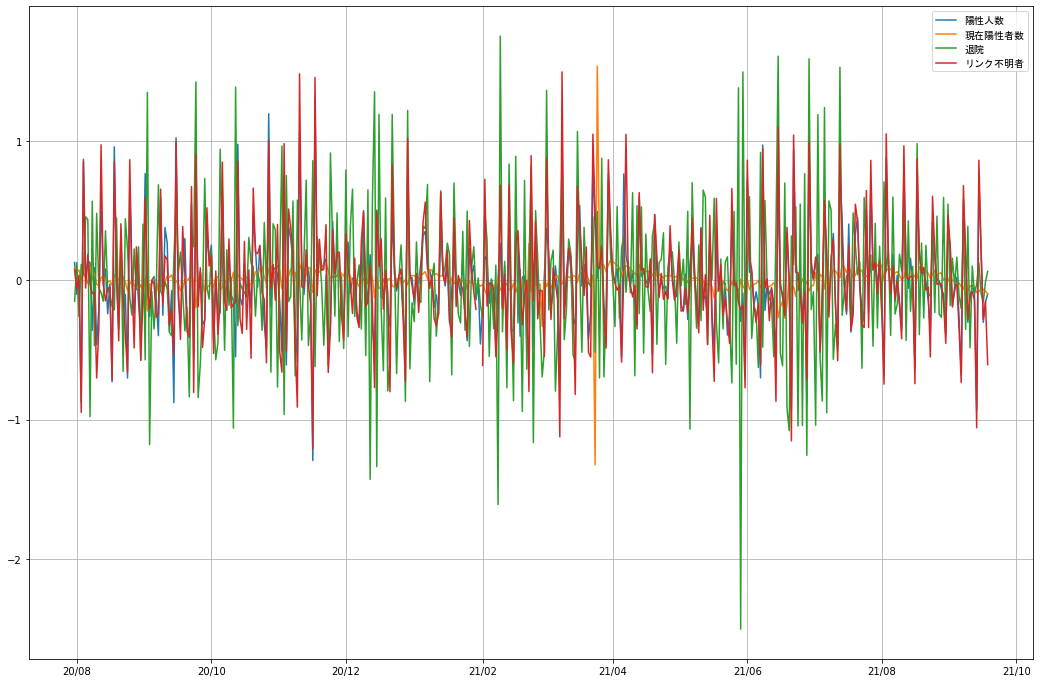

In [134]:
remove_name = ['日付', '検査件数']

plt.figure(figsize=(18,12))

for name in test.columns:
    if not name in remove_name:
        plt.plot(test['日付'], test[name], label=name)    
        
# フォーマット変更はこれ追加 / ("%y/%m")をいじる
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y/%m")) 


# 目盛のインターバル変更はこれ追加 /（interval=2）の数値をいじる
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        
plt.legend(prop={"family":"MS Gothic"})
plt.grid()
plt.show()

## 別々表示

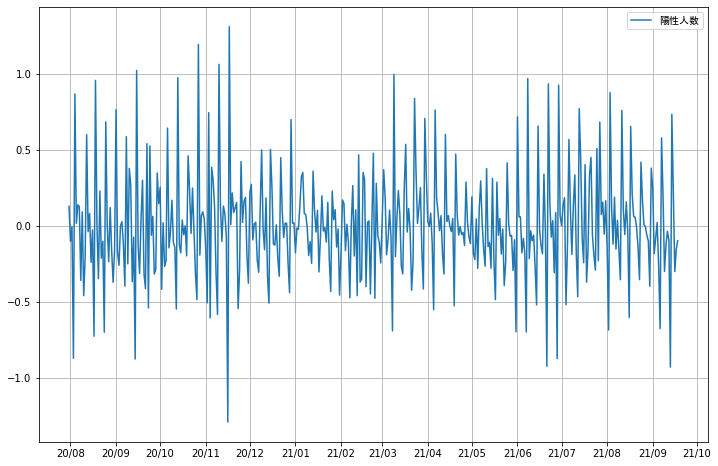

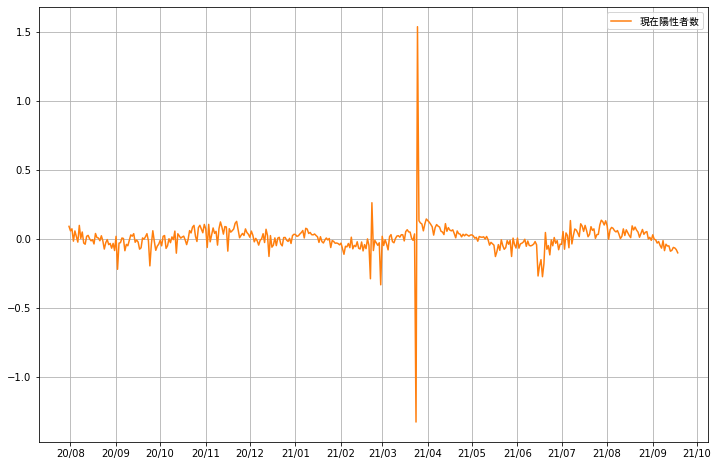

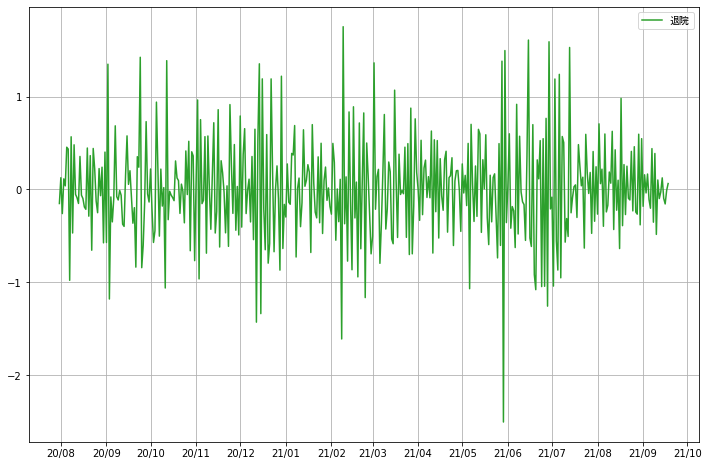

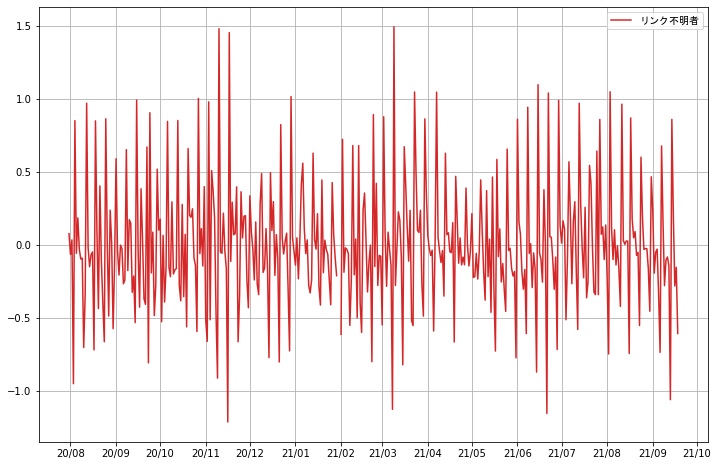

In [135]:
n = 0 

for name in test.columns:
    if not name in remove_name:
        plt.figure(figsize=(12,8))
        plt.plot(test['日付'], test[name], label=name, c=c[n])
        n += 1
        
        # フォーマット変更はこれ追加 / ("%y/%m")をいじる
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y/%m")) 


        # 目盛のインターバル変更はこれ追加 /（interval=2）の数値をいじる
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

        plt.legend(prop={"family":"MS Gothic"})
        plt.grid()
        plt.show()

In [120]:
test.var()

検査件数      0.186510
陽性人数      0.128346
現在陽性者数    0.014287
退院        0.306186
リンク不明者         NaN
dtype: float64

In [121]:
diff_data.var()

検査件数      8.785727e+06
陽性人数      3.091560e+04
現在陽性者数    1.912195e+05
退院        6.828837e+04
死亡        3.918552e+01
リンク不明者    1.778525e+04
dtype: float64

# 移動平均

In [136]:
# csvファイルを読み込む
df_csv = pd.read_csv('./data/'+before_csv, encoding='shift-jis')
csv_data = df_csv.drop(['日付'], axis=1)

In [137]:
csv_data

,検査件数,陽性人数,現在陽性者数,退院,死亡,リンク不明者,病床使用率
0,2070,190,1154,121,0,135,21.0
1,2328,216,1265,104,1,146,23.0
2,2293,195,1342,118,0,137,24.0
3,1562,194,1445,91,0,142,29.0
4,1266,81,1423,102,1,55,30.0
...,...,...,...,...,...,...,...
411,6947,942,15603,2285,4,556,60.0
412,16708,1160,14684,2075,9,685,56.0
413,16887,858,13765,1775,12,518,54.0
414,20092,735,12749,1755,5,445,52.0


In [144]:
move_average = csv_data.rolling(7, center=True, min_periods=4).mean().round(1)
move_average.drop('病床使用率', axis=1, inplace=True)
move_average

,検査件数,陽性人数,現在陽性者数,退院,死亡,リンク不明者
0,2063.2,198.8,1301.5,108.5,0.2,140.0
1,1903.8,175.2,1325.8,107.2,0.4,123.0
2,1983.0,178.2,1356.3,107.0,0.5,124.0
3,2000.7,180.7,1382.3,115.6,0.4,123.7
4,2059.4,185.7,1432.3,135.1,0.6,125.4
...,...,...,...,...,...,...
411,15621.9,936.7,15953.0,2038.4,5.1,556.9
412,15227.9,851.4,14825.0,1978.7,6.3,479.9
413,15039.2,802.2,14213.0,1962.8,7.2,447.0
414,15508.2,872.2,13667.8,1952.0,7.8,489.4


In [145]:
date_tb = df_csv['日付']
date_tb = pd.to_datetime(date_tb)
move_average.insert(0, '日付', date_tb)
move_average

,日付,検査件数,陽性人数,現在陽性者数,退院,死亡,リンク不明者
0,2020-07-30,2063.2,198.8,1301.5,108.5,0.2,140.0
1,2020-07-31,1903.8,175.2,1325.8,107.2,0.4,123.0
2,2020-08-01,1983.0,178.2,1356.3,107.0,0.5,124.0
3,2020-08-02,2000.7,180.7,1382.3,115.6,0.4,123.7
4,2020-08-03,2059.4,185.7,1432.3,135.1,0.6,125.4
...,...,...,...,...,...,...,...
411,2021-09-14,15621.9,936.7,15953.0,2038.4,5.1,556.9
412,2021-09-15,15227.9,851.4,14825.0,1978.7,6.3,479.9
413,2021-09-16,15039.2,802.2,14213.0,1962.8,7.2,447.0
414,2021-09-17,15508.2,872.2,13667.8,1952.0,7.8,489.4


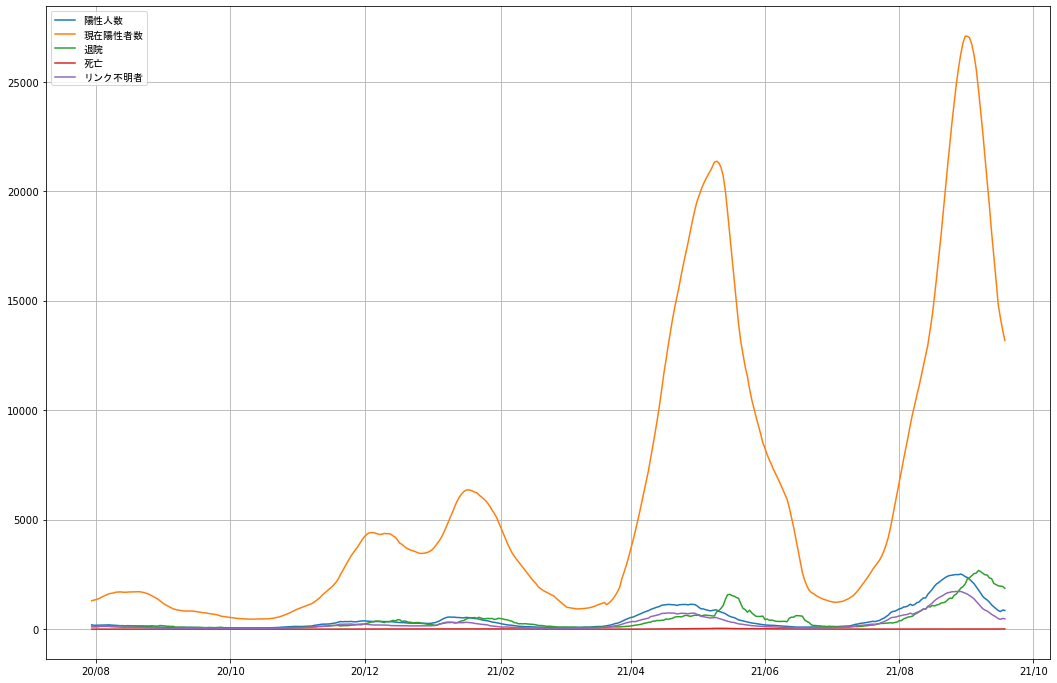

In [151]:
remove_name = ['日付', '検査件数']

plt.figure(figsize=(18,12))

for name in move_average.columns:
    if not name in remove_name:
        plt.plot(move_average['日付'], move_average[name], label=name)    
        
# フォーマット変更はこれ追加 / ("%y/%m")をいじる
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y/%m")) 


# 目盛のインターバル変更はこれ追加 /（interval=2）の数値をいじる
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        
plt.legend(prop={"family":"MS Gothic"})
plt.grid()
plt.show()

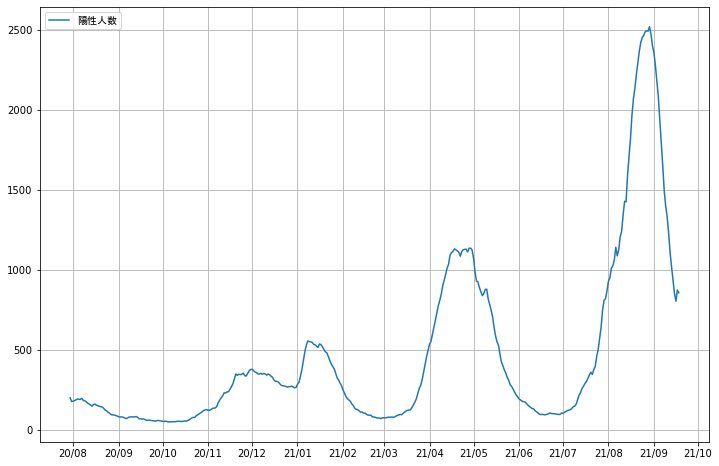

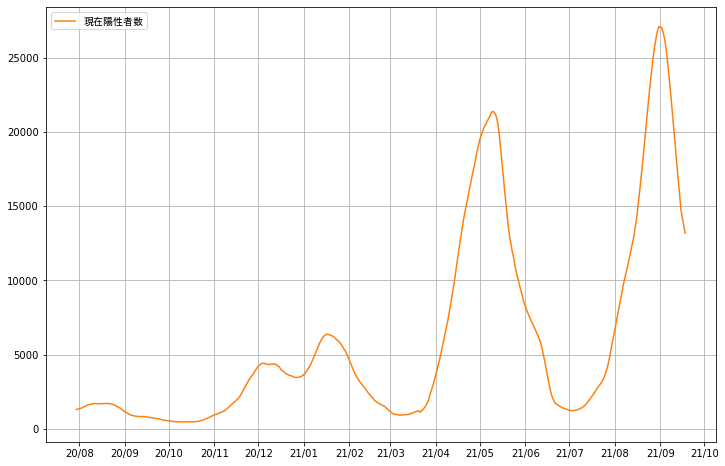

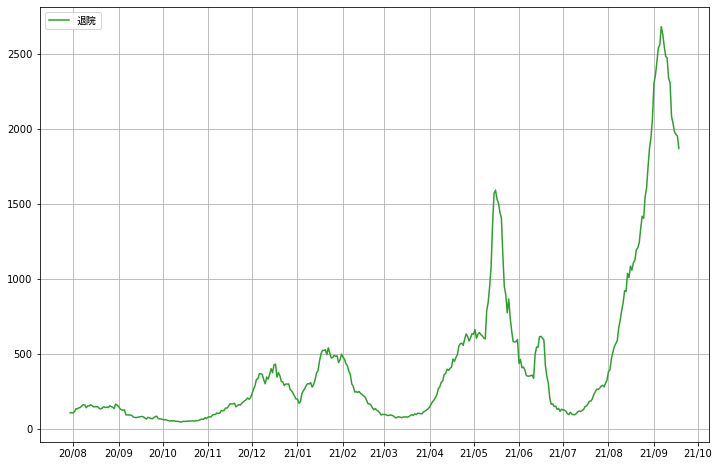

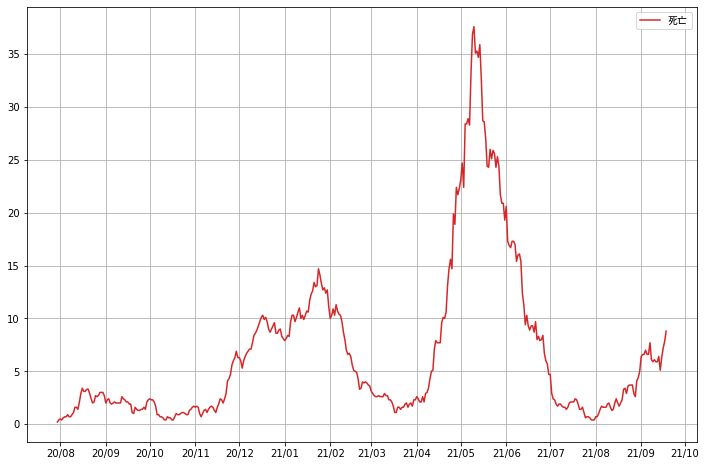

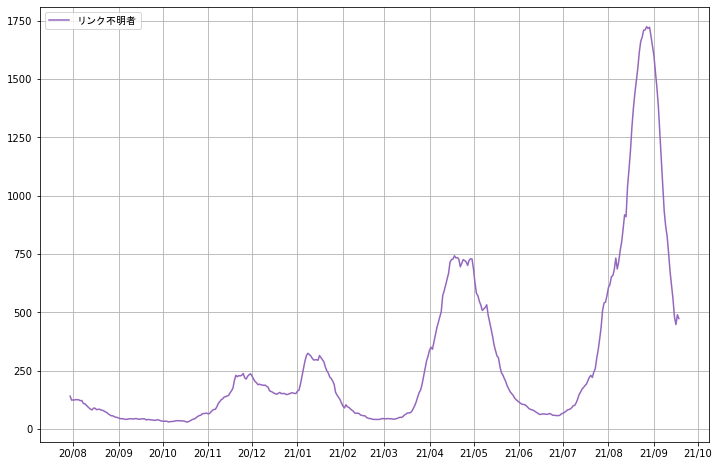

In [155]:
n = 0 
for name in move_average.columns:
    if not name in remove_name:
        plt.figure(figsize=(12,8))
        plt.plot(move_average['日付'], move_average[name], label=name, c=c[n])
        n += 1
        
        # フォーマット変更はこれ追加 / ("%y/%m")をいじる
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y/%m")) 


        # 目盛のインターバル変更はこれ追加 /（interval=2）の数値をいじる
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

        plt.legend(prop={"family":"MS Gothic"})
        plt.grid()
        plt.show()

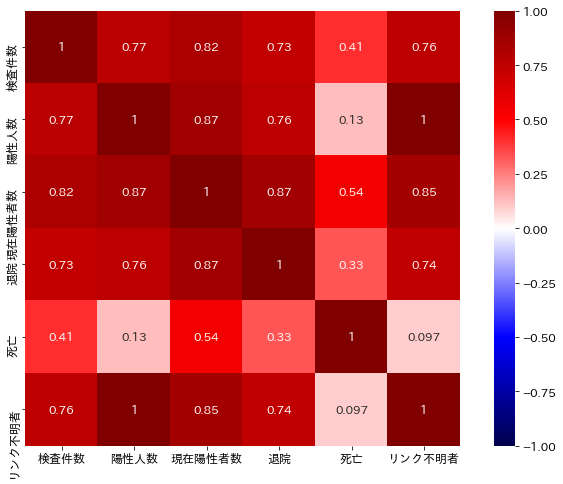

In [157]:
#日本語表示用
import japanize_matplotlib
# ライブラリのインポート
import seaborn as sns

# 相関行列
correlation_coefficients = move_average.corr()  # 相関行列の計算
# 相関行列のヒートマップ (相関係数の値あり) 
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 8))  # この段階で画像のサイズを指定する
sns.heatmap(correlation_coefficients, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, correlation_coefficients.shape[0]])
plt.show()

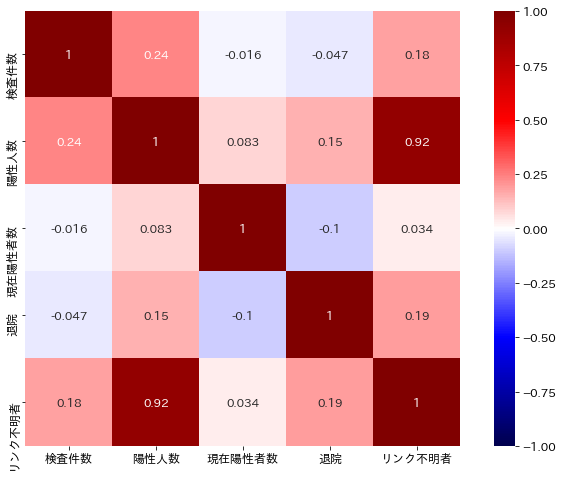

In [158]:
# 相関行列
correlation_coefficients = test.corr()  # 相関行列の計算
# 相関行列のヒートマップ (相関係数の値あり) 
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 8))  # この段階で画像のサイズを指定する
sns.heatmap(correlation_coefficients, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, correlation_coefficients.shape[0]])
plt.show()

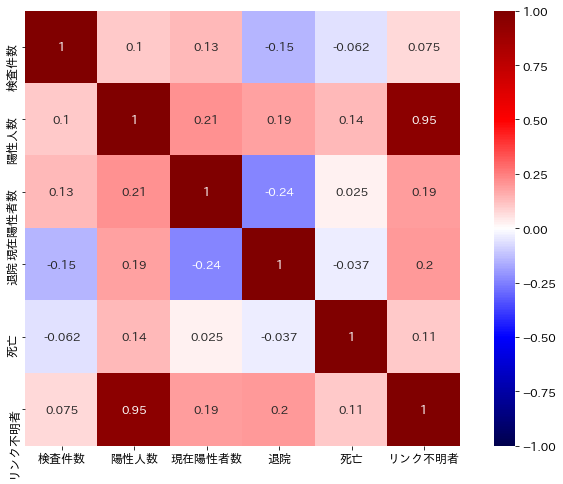

In [159]:
# 相関行列
correlation_coefficients = diff_data.corr()  # 相関行列の計算
# 相関行列のヒートマップ (相関係数の値あり) 
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 8))  # この段階で画像のサイズを指定する
sns.heatmap(correlation_coefficients, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, correlation_coefficients.shape[0]])
plt.show()